In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import fnmatch
import csv
import pickle
import warnings
import time
import scipy


from multiprocess import Pool
from multiprocess import Process


warnings.filterwarnings('ignore')

### Required for building NN ###
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from termcolor import colored
import tensorflow.keras.backend as K

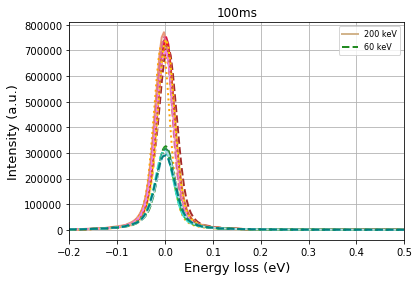

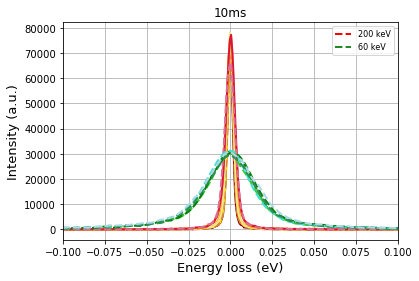

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y7,y8,y9,y10,y11,y12,y13,y14,time,energy
0,-0.954367,-0.944701,-0.937729,-0.958633,-0.948669,-0.849981,-0.849981,-0.923697,-0.923995,-0.923974,...,92.20340,105.04800,13.45050,12.18790,155.20100,85.3088,63.73150,112.94600,100,200
1,-0.949700,-0.940104,-0.933188,-0.953899,-0.944007,-0.845943,-0.845943,-0.919090,-0.919584,-0.919522,...,78.92470,74.33620,25.23600,49.73030,50.40090,56.2916,2.69122,9.44138,100,200
2,-0.945034,-0.935507,-0.928647,-0.949165,-0.939345,-0.841906,-0.841906,-0.914483,-0.915173,-0.915070,...,2.07308,-61.09940,43.59180,7.21912,64.60960,-13.0748,-26.52960,-4.13263,100,200
3,-0.940368,-0.930910,-0.924106,-0.944431,-0.934683,-0.837868,-0.837868,-0.909876,-0.910763,-0.910618,...,-81.36660,19.94870,3.99171,-96.36250,19.54320,63.6954,-49.04250,100.48400,100,200
4,-0.935701,-0.926313,-0.919565,-0.939697,-0.930021,-0.833830,-0.833830,-0.905269,-0.906352,-0.906166,...,-29.48940,44.42410,11.74030,25.47450,-2.63605,21.0576,57.26170,80.27130,100,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,8.579001,8.447313,8.339865,8.712997,8.575721,7.399130,7.399130,8.488369,8.087052,8.171466,...,-57.73360,-30.63200,-63.48630,-94.41850,19.38750,-87.4528,-59.78820,-89.61530,100,200
2044,8.583668,8.451910,8.344406,8.717731,8.580383,7.403168,7.403168,8.492976,8.091463,8.175918,...,-43.72820,-42.44820,2.59805,-44.51020,7.85684,73.2205,-27.22800,69.37240,100,200
2045,8.588334,8.456507,8.348947,8.722465,8.585045,7.407206,7.407206,8.497583,8.095873,8.180370,...,-47.30900,-69.28850,-138.34900,-37.34680,-22.39200,-33.2063,-32.43110,18.32600,100,200
2046,8.593000,8.461104,8.353488,8.727199,8.589707,7.411243,7.411243,8.502190,8.100284,8.184822,...,-96.15140,41.74130,-70.35200,-64.79110,-26.25640,-113.8630,-73.95380,16.47460,100,200


In [172]:
%run EELS-ZLP-Mar.py

file100_200


In [173]:
file10_200.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y4,y5,y6,y7,y8,y9,y10,y11,time,energy
0,-0.108793,-0.117982,-0.117777,-0.117773,-0.117773,-0.140832,-0.140731,-0.187318,-0.187640,-0.187641,...,-75.387300,-75.73890,-114.1590,-46.1964,-0.187640,-0.187641,-0.187638,-0.187637,10,200
1,-0.108378,-0.117525,-0.117330,-0.117319,-0.117319,-0.140277,-0.140193,-0.186593,-0.186920,-0.186924,...,-33.707900,29.46010,95.2029,39.0701,-0.186920,-0.186924,-0.186915,-0.186911,10,200
2,-0.107964,-0.117069,-0.116883,-0.116865,-0.116865,-0.139721,-0.139655,-0.185868,-0.186199,-0.186206,...,-48.520600,-48.52620,65.3483,-146.4890,-0.186199,-0.186206,-0.186192,-0.186185,10,200
3,-0.107550,-0.116613,-0.116436,-0.116412,-0.116412,-0.139166,-0.139116,-0.185144,-0.185479,-0.185489,...,37.593300,-9.59003,-48.0415,-12.9525,-0.185479,-0.185489,-0.185469,-0.185459,10,200
4,-0.107135,-0.116156,-0.115989,-0.115958,-0.115958,-0.138610,-0.138578,-0.184419,-0.184759,-0.184771,...,0.320813,16.97260,15.9683,56.2032,-0.184759,-0.184771,-0.184746,-0.184734,10,200


In [207]:
## Drop all data between FWHM and end

,x,y,sigma,time,energy
count,870.000000,807.000000,870.000000,870.000000,870.000000
mean,0.620690,0.097173,0.008918,47.241379,142.068966
std,1.557507,0.199712,0.033615,44.351604,68.991384
min,-0.100000,-0.000669,0.001000,10.000000,60.000000
25%,-0.042282,0.000713,0.001000,10.000000,60.000000
50%,0.016054,0.013877,0.001000,10.000000,200.000000
75%,0.074497,0.065843,0.003623,100.000000,200.000000
max,5.000000,0.968101,0.424144,100.000000,200.000000


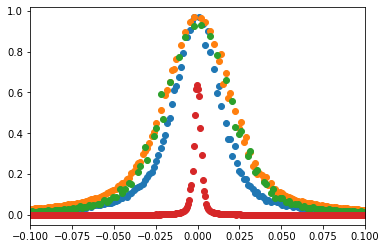

In [250]:
%run Functions.ipynb
meanfile = pd.DataFrame()
mean = []

file10_60 = pd.read_csv('Data/Vacuum/Datafiles/10_60_total.csv', skiprows = 1, names=columns)
file100_60 = pd.read_csv('Data/Vacuum/Datafiles/100_60_total.csv', skiprows = 1, names=columns)
file10_200 = pd.read_csv('Data/Vacuum/Datafiles/10_200_total.csv', skiprows = 1, names=columns)
file100_200 = pd.read_csv('Data/Vacuum/Datafiles/100_200_total.csv', skiprows = 1, names=columns)

for i, file in enumerate([file10_60, file100_60, file100_200, file10_200]):
    E_min = -.1
    E_max = 0.1
    window_file = file[(file['x'] > E_min) & (file['x'] < E_max)]
    window_file['y_norm'] = np.divide(window_file['y'], window_file['y'].max())
    
    if i == 3:
        nbins = 300
    else:
        nbins = 150
        
    meanfile = pd.DataFrame()
    meanfile['x'] = np.linspace(E_min, E_max, nbins)
    meanfile['y'] = binned_statistics(window_file['x'], window_file['y_norm'], nbins)[0]
    meanfile['sigma'] = binned_statistics(window_file['x'], window_file['y_norm'], nbins)[1]
    meanfile['time'] = file['time'].max()
    meanfile['energy'] = file['energy'].max()
    
    meanfile['sigma'][meanfile['sigma'] < .003] = .001
    time=file['time']
    energy = file['energy']
    ## Create pseudo data 
    min_x = dE2 = 4
    max_x = 5
    N_pseudo = 30

    df_pseudo = pd.DataFrame({'x':np.linspace(min_x, max_x, N_pseudo),'y': .01 * np.ones(N_pseudo), \
                        'sigma': .001 * np.ones(N_pseudo), 'time': time.max(), 'energy': energy.max()})

    df_full = pd.concat([meanfile, df_pseudo])

    df_full.describe()
    ###########
    
    plt.plot(df_full['x'],df_full['y'], 'o')
    #plt.fill_between(df_full['x'], df_full['y']+df_full['sigma'],df_full['y']-df_full['sigma'], alpha=.2)
    plt.xlim([-.1, .1])
    
    mean.append(df_full)
    
total_mean = pd.concat(mean, axis=0, ignore_index=True)
total_mean.describe()

### Create architecture

In [251]:
def make_model(inputs, n_outputs):
    hidden_layer_1 = tf.layers.dense(inputs, 10, activation=tf.nn.sigmoid)
    hidden_layer_2 = tf.layers.dense(hidden_layer_1, 15, activation=tf.nn.sigmoid)
    hidden_layer_3 = tf.layers.dense(hidden_layer_2, 5, activation=tf.nn.sigmoid)
    #hidden_layer_3 = tf.layers.dropout(hidden_layer_3, 0.15)
    output = tf.layers.dense(hidden_layer_3, n_outputs, name='outputs', reuse=tf.AUTO_REUSE)
    return output



### Prepare data for training

Cost function: $\chi^2 = 1/N \sum (y - y_{pred})^2 / \sigma^2$ \
Optimizer: AdamOptimizer, $\eta = 0.02$\

Training points are generated by Monte Carlo sampling; for the set of training points $[dE, D_i, \sigma_i]$, a set of MC training points is generated by adding a stochastic noise signal on top of the the data with a std equal to the corresponding error on that point. 

- **train_x**: $[dE, t_{exp}]$
- **train_y**: $D_i$ + rand.norm(0, $\sigma_i$)

Repetitive training of the NN (number of repetitions = $N_{rep}$) on each set of MC pseudo data yields a prediction that is distributed with a mean and std corresponding to the mean and error of the original training set. 


In [282]:
tf.compat.v1.get_default_graph
from copy import copy
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
%run Functions.ipynb

x = tf.placeholder("float", [None, 3], name="x")
y = tf.placeholder("float", [None, 1], name="y")
sigma = tf.placeholder("float", [None, 1], name="sigma")

df_full = total_mean
#df_full = df_full.drop_duplicates(subset=['y'])
df_full = df_full.sort_values(by='x')


df_full.describe()

,x,y,sigma,time,energy
count,870.000000,807.000000,870.000000,870.000000,870.000000
mean,0.620690,0.097173,0.008918,47.241379,142.068966
std,1.557507,0.199712,0.033615,44.351604,68.991384
min,-0.100000,-0.000669,0.001000,10.000000,60.000000
25%,-0.042282,0.000713,0.001000,10.000000,60.000000
50%,0.016054,0.013877,0.001000,10.000000,200.000000
75%,0.074497,0.065843,0.003623,100.000000,200.000000
max,5.000000,0.968101,0.424144,100.000000,200.000000


In [264]:
df_train, df_test = train_test_split(df_full, test_size=0.2)

cols=[ 'x', 'time', 'energy', 'sigma']
train_inputs = df_train.drop(['y'], axis=1)[cols]
train_outputs = df_train['y']
test_inputs = df_test.drop(['y'], axis=1)[cols]
test_outputs = df_test['y']

train_x = train_inputs.drop('sigma', axis=1).to_numpy()
train_y = train_outputs.to_numpy()
train_sigma = train_inputs['sigma'].to_numpy()
test_x = test_inputs.drop('sigma', axis=1).to_numpy()
test_y = test_outputs.to_numpy()
test_sigma = test_inputs['sigma'].to_numpy()

df_test.describe()


,x,y,sigma,time,energy
count,174.000000,159.000000,174.000000,174.000000,174.000000
mean,0.611944,0.090929,0.008730,50.862069,150.919540
std,1.550370,0.188236,0.030842,44.938667,66.993783
min,-0.100000,-0.000470,0.001000,10.000000,60.000000
25%,-0.043170,0.000910,0.001000,10.000000,60.000000
50%,0.012081,0.011682,0.001000,10.000000,200.000000
75%,0.068368,0.068274,0.003408,100.000000,200.000000
max,5.000000,0.968101,0.360364,100.000000,200.000000


## Create MC replicas

In [265]:
### Create array of Nrep training samples
Nrep = 5000
N_train = len(train_x)
N_test = len(test_x)
#pbar = tqdm(total=Nrep)
def pseudodata(Nrep):
    train_y_reps = np.zeros(shape=(N_train, Nrep))
    test_y_reps = np.zeros(shape=(N_test, Nrep))
    i=0
    while i < Nrep:
        train_rep = np.random.normal(0, train_sigma)
        test_rep = np.random.normal(0, test_sigma)
        train_y_reps[:,i] = (train_y + train_rep).reshape(N_train)
        test_y_reps[:,i] = (test_y + test_rep).reshape(N_test)

        i+=1 
    std_reps = np.std(train_y_reps, axis=1)
    mean_reps = np.mean(train_y_reps, axis=1)
    
    return mean_reps, std_reps
mean_reps100, std_reps100 = pseudodata(100)
mean_reps500, std_reps500 = pseudodata(500)
mean_reps1000, std_reps1000 = pseudodata(1000)
mean_reps5000, std_reps5000 = pseudodata(5000)

In [271]:
## Beam energy interpolation

import random

part1 = 1000
N_pred = 10 * part1

interpol_energy1 = .2 #*100 keV
interpol_energy2 = .4 #*100 keV
interpol_energy3 = .6
interpol_energy4 = .8
interpol_energy5 = 1.2
interpol_energy6 = 1.8
interpol_energy7 = 2
interpol_energy8 = 2.2
interpol_energy9 = 2.5
interpol_energy10 = 3

interpol_time = .1
E_min = -.8
E_max = -.1

#Energy --> Energy range veranderen zodat het alleen interpolatie doet op E. 
predict_x = np.zeros(shape=(N_pred, 3))
predict_x[0*part1:1*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[1*part1:2*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[2*part1:3*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[3*part1:4*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[4*part1:5*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[5*part1:6*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[6*part1:7*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[7*part1:8*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[8*part1:9*part1, 0] = np.linspace(E_min,E_max,part1)
predict_x[9*part1:10*part1, 0] = np.linspace(E_min,E_max,part1)

#Time
predict_x[:,1] = interpol_time * np.ones(N_pred)

# E_beam
predict_x[0*part1:1*part1,2] = interpol_energy1 * np.ones(part1)
predict_x[1*part1:2*part1,2] = interpol_energy2 * np.ones(part1)
predict_x[2*part1:3*part1,2] = interpol_energy3 * np.ones(part1)
predict_x[3*part1:4*part1,2] = interpol_energy4 * np.ones(part1)
predict_x[4*part1:5*part1,2] = interpol_energy5 * np.ones(part1)
predict_x[5*part1:6*part1,2] = interpol_energy6 * np.ones(part1)
predict_x[6*part1:7*part1,2] = interpol_energy7 * np.ones(part1)
predict_x[7*part1:8*part1,2] = interpol_energy8 * np.ones(part1)
predict_x[8*part1:9*part1,2] = interpol_energy9 * np.ones(part1)
predict_x[9*part1:10*part1,2] = interpol_energy10 * np.ones(part1)

predict_x2 = copy(predict_x)
predict_x2[:,1] = 1 * np.ones(N_pred)
predict_x = np.vstack([predict_x, predict_x2])

In [272]:
predict_x

array([[-0.8      ,  0.1      ,  0.2      ],
       [-0.7992993,  0.1      ,  0.2      ],
       [-0.7985986,  0.1      ,  0.2      ],
       ...,
       [-0.1014014,  1.       ,  3.       ],
       [-0.1007007,  1.       ,  3.       ],
       [-0.1      ,  1.       ,  3.       ]])

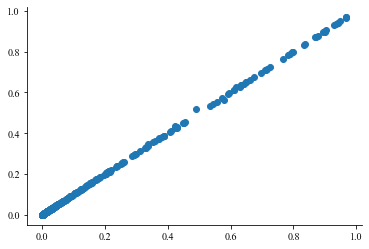

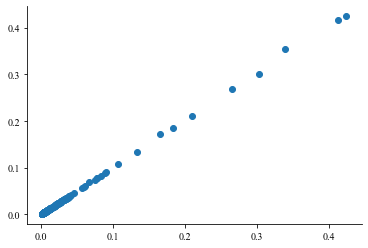

In [273]:
Nrep = 1000

train_y_reps = np.zeros(shape=(N_train, Nrep))
test_y_reps = np.zeros(shape=(N_test, Nrep))
i=0
while i < Nrep:
        train_rep = np.random.normal(0, train_sigma)
        test_rep = np.random.normal(0, test_sigma)
        train_y_reps[:,i] = (train_y + train_rep).reshape(N_train)
        test_y_reps[:,i] = (test_y + test_rep).reshape(N_test)
        i+=1 
        
std_reps = np.std(train_y_reps, axis=1)
mean_reps = np.mean(train_y_reps, axis=1)

train_sigma.shape
plt.plot(train_y, mean_reps, 'o')
plt.show()
plt.plot(train_sigma, std_reps, 'o')
plt.show()

In [290]:
import time
from datetime import datetime
now = datetime.now()
import tensorflow.compat.v1 as tf

x = tf.placeholder("float", [None, 3], name="x")
y = tf.placeholder("float", [None, 1], name="y")
sigma = tf.placeholder("float", [None, 1], name="sigma")


def function_train(it):
    
    chi_array = []
    
    processor = 'processor' + str(it)
    cost = tf.reduce_mean(tf.square((y-predictions)/sigma), name="cost_function")
    custom_cost = tf.reduce_mean(tf.square((y-predictions)/sigma), name="custom_cost_function")
    eta = 3e-2
    optimizer = tf.train.RMSPropOptimizer(learning_rate=eta, decay=0.9, momentum=0.0, epsilon=1e-10).minimize(cost)
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate=eta)
    saver = tf.train.Saver(max_to_keep=1000)
    print("%(p)s starts training on" %{'p': processor}, '%04d' %(N_train), "and validating on", '%0.4d' %(N_test), "samples")
    
    Nrep = 200

    for i in range(Nrep):

        train_y = train_y_reps[:, i*4 + it].reshape(N_train,1)
        test_y = test_y_reps[:, i*4 + it].reshape(N_test,1)
        
        ### Train and validate
        prev_test_cost = 100
        prev_epoch=0
        avg_cost = 0.0

        array_train = []
        array_test = []

        with tf.Session() as sess:
 
            sess.run(tf.global_variables_initializer())
            
            training_epochs = 25000
            max_rising_epochs = 50000 #The amount of epochs the minimzer is allowed to overfit before it stops
            display_step = 1000

            for epoch in range(training_epochs):

                _, c = sess.run([optimizer, cost], 
                                feed_dict={
                                    x: train_x,
                                    y: train_y,
                                    sigma: train_sigma
                                })

                avg_cost = c
                
                test_cost = cost.eval({x: test_x, y: test_y, sigma: test_sigma})


                if epoch % display_step == 0:
                    print("Epoch:", '%04d' % (epoch+1), "| Training cost=", "{:.9f}".format(avg_cost), "| Validation cost=", "{:.9f}".format(test_cost))
                    array_train.append(avg_cost)
                    array_test.append(test_cost)
                    saver.save(sess, 'Models/%(processor)s/my-model.ckpt' %{'processor': processor} , global_step=epoch , write_meta_graph=False) 

                    
                elif test_cost < prev_test_cost:
                    prev_test_cost = test_cost
                    prev_epoch = epoch

            best_iteration = np.argmin(array_test) 
            best_epoch = best_iteration * display_step
            best_model = 'Models/%(processor)s/my-model.ckpt-%(s)s' % {'processor': processor, 's': best_epoch}

            print("Optimization %(i)s Finished! Best model after epoch %(s)s" % {'i': i, 's': best_epoch})
            


            dt_string = now.strftime("%d.%m.%Y %H:%M:%S")
            d_string = now.strftime("%d.%m.%Y")
            t_string = now.strftime("%H:%M:%S")
            
            saver.restore(sess, best_model)
            saver.save(sess, 'Models/Best_model/%(s)s_x1_processor%(it)s_%(i)s' % {'s': d_string, 'it': it, 'i': i})


            predictions_values = sess.run(predictions, 
                                feed_dict={
                                    x: train_x,
                                    y: train_y 
                                }) 

            
            extrapolation = sess.run(predictions,
                                feed_dict={
                                    x: predict_x
                                })
            

        sess.close()
        

        

        a = np.array(train_x).reshape(N_train,)
        b = np.array(train_y).reshape(N_train,)
        c = np.array(predictions_values).reshape(N_train,)
        d = array_train
        e = array_test
       
        k = np.array(predict_x).reshape(N_pred,)
        l = np.array(extrapolation).reshape(N_pred,)
        
        np.savetxt('Data/Results/Vacuum/%(date)s/x1_xyp1p2_e%(epoch)s_%(i)s.csv' % {"date": d_string, "epoch": processor, "i": i+10 }, list(zip(a,b,c)),  delimiter=',', fmt='%f')
        np.savetxt('Data/Results/Vacuum/%(date)s/x1_chi_e%(epoch)s_%(i)s.csv' % {"date": d_string, "epoch": processor, "i": i +10}, list(zip(d,e)),  delimiter=',',fmt='%f')
        np.savetxt('Data/Results/Vacuum/%(date)s/x1_extrapolation_e%(epoch)s_%(i)s.csv' % {"date": d_string, "epoch": processor, "i": i +10}, list(zip(k, l)),  delimiter=',', fmt='%f')
 

## Run

In [291]:
from multiprocess import Pool
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

number_of_cores=4
# start your parallel workers at the beginning of your script
pool = Pool(number_of_cores)

# execute a computation(s) in parallel
result1 = pool.map(function_train, [1,2,3,4])

pool.close()

#print(pool)

NameError: name 'y' is not defined

,x,time,energy
0,-0.800000,0.1,0.0
1,-0.792929,0.1,0.0
2,-0.785859,0.1,0.0
3,-0.778788,0.1,0.0
4,-0.771717,0.1,0.0
...,...,...,...
95,-0.128283,1.0,3.0
96,-0.121212,1.0,3.0
97,-0.114141,1.0,3.0
98,-0.107071,1.0,3.0


In [376]:
d_string = '29.06.2020'
prediction_file = predict_full.copy()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(30):
        best_model = 'Models/Best_model/%(s)s_round2_%(i)s' % {'s': d_string, 'i': i}
        saver.restore(sess, best_model)
    
        extrapolation = sess.run(predictions,
                                feed_dict={
                                x: predict_x
                                })

        prediction_file['prediction_%(i)s' % {"i": i}] = extrapolation


    

#plt.plot(predict_full['x'], predict_full['prediction'], colormap=predict_full['energy'], alpha=.8)   


prediction_file

INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_0
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_1
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_2
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_3
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_4
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_5
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_6
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_7
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_8
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_9
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_10
INFO:tensorflow:Restoring parameters from Models/Best_model/29.06.2020_round2_11
INFO:tensorflow:Restoring parameters f

,x,time,energy,prediction_0,prediction_1,prediction_2,prediction_3,prediction_4,prediction_5,prediction_6,...,prediction_20,prediction_21,prediction_22,prediction_23,prediction_24,prediction_25,prediction_26,prediction_27,prediction_28,prediction_29
0,-0.800000,0.1,0.0,0.115906,0.149607,0.132163,0.175075,0.127988,0.252537,0.128812,...,0.133032,0.111818,0.168423,0.126076,0.128798,0.115124,0.117097,0.168629,0.381279,0.667458
1,-0.792929,0.1,0.0,0.116442,0.150975,0.133128,0.177032,0.128622,0.257197,0.128622,...,0.134082,0.112092,0.172084,0.127075,0.129420,0.115644,0.117635,0.174742,0.384270,0.589499
2,-0.785859,0.1,0.0,0.117023,0.152380,0.134160,0.178943,0.129289,0.262147,0.128536,...,0.135169,0.112392,0.175987,0.128140,0.130086,0.116196,0.118218,0.181910,0.387225,0.518548
3,-0.778788,0.1,0.0,0.117653,0.153823,0.135262,0.180804,0.129992,0.267411,0.128822,...,0.136295,0.112718,0.180141,0.129276,0.130800,0.116782,0.118850,0.190373,0.390142,0.456079
4,-0.771717,0.1,0.0,0.118337,0.155305,0.136440,0.182615,0.130734,0.273016,0.129681,...,0.137461,0.113076,0.184551,0.130488,0.131570,0.117406,0.119535,0.200430,0.393023,0.402736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.128283,1.0,3.0,0.105161,0.102791,0.107806,0.105884,0.106707,0.108440,0.107939,...,0.105436,0.103892,0.102994,0.111841,0.102673,0.102606,0.103258,0.103609,0.105602,0.103443
96,-0.121212,1.0,3.0,0.105058,0.102785,0.107705,0.105721,0.106590,0.108314,0.107385,...,0.105336,0.103855,0.102983,0.111514,0.102663,0.102586,0.103253,0.103588,0.105475,0.103431
97,-0.114141,1.0,3.0,0.104971,0.102778,0.107629,0.105576,0.106473,0.108193,0.106852,...,0.105247,0.103821,0.102974,0.111187,0.102652,0.102568,0.103248,0.103570,0.105353,0.103423
98,-0.107071,1.0,3.0,0.104898,0.102773,0.107576,0.105449,0.106354,0.108074,0.106340,...,0.105166,0.103790,0.102965,0.110861,0.102642,0.102552,0.103244,0.103555,0.105238,0.103419


In [377]:
predict_full['pred_mean'] = prediction_file.iloc[:,3:].mean(axis=1)
predict_full['pred_std'] = prediction_file.iloc[:,3:].std(axis=1)

predict_full


,x,time,energy,pred_mean,pred_std
0,-0.800000,0.1,0.0,0.177722,0.112108
1,-0.792929,0.1,0.0,0.176950,0.101526
2,-0.785859,0.1,0.0,0.176557,0.093175
3,-0.778788,0.1,0.0,0.176641,0.087376
4,-0.771717,0.1,0.0,0.177271,0.084183
...,...,...,...,...,...
95,-0.128283,1.0,3.0,0.106818,0.010433
96,-0.121212,1.0,3.0,0.106631,0.009939
97,-0.114141,1.0,3.0,0.106461,0.009495
98,-0.107071,1.0,3.0,0.106305,0.009096


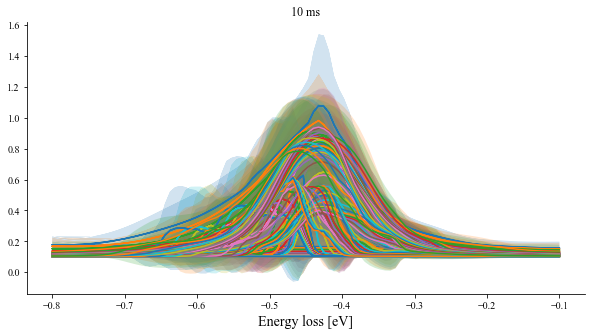

In [378]:
from matplotlib import cm
cm_subsection = np.linspace(0,1,10) 
colors = [ cm.viridis(x) for x in cm_subsection ]

groups= predict_full.groupby(['time', 'energy'])
groups_time = predict_full.groupby(['time'])
#groups_time = groups.groupby('time')
fig, ax = plt.subplots()
fig.set_size_inches((10,5))
#ax.set_color_cycle(colors)
i=0

for name, group in groups:
    ax.plot(group.x, group.pred_mean, label=str(label))
    ax.fill_between(group.x, group.pred_mean + group.pred_std/2, group.pred_mean - group.pred_std/2, alpha=.2)
    i+=1
ax.set_title('10 ms')
ax.set_xlabel('Energy loss [eV]', fontsize=14)
fig.show()

(0, 300)

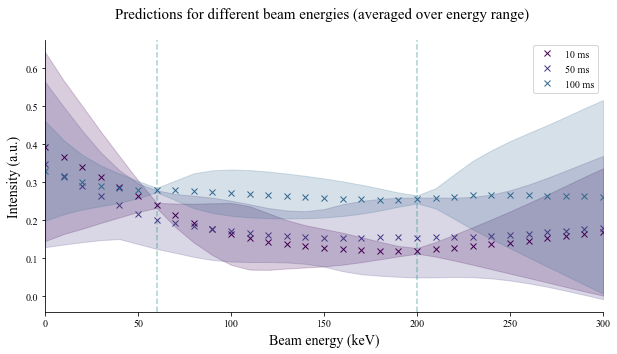

In [379]:
from matplotlib import cm
cm_subsection = np.linspace(0,1,7) 
colors = [ cm.viridis(x) for x in cm_subsection ]

fig, ax = plt.subplots()
fig.set_size_inches((10,5))
ax.axvline(60, linestyle='--', color=colors[3], alpha=.4)
ax.axvline(200, linestyle='--', color=colors[3], alpha=.4)

i=0
for name, group in groups_time:
    mean_energy = group.groupby('energy').mean()
    ax.plot(100*predict_full['energy'].unique(), mean_energy.pred_mean, 'x', color=colors[i], label=str(round(name*100))+' ms')
    ax.fill_between(100*predict_full['energy'].unique(), mean_energy.pred_mean + mean_energy.pred_std, \
                    mean_energy.pred_mean - mean_energy.pred_std, color=colors[i], alpha=.2 )
    i+=1
    
ax.legend()
ax.set_title('Predictions for different beam energies (averaged over energy range) \n', fontsize=15)
ax.set_xlabel('Beam energy (keV)', fontsize=14)
ax.set_ylabel('Intensity (a.u.)', fontsize=14)
ax.set_xlim([0,300])
 

ValueError: x and y must have same first dimension, but have shapes (31,) and (62,)

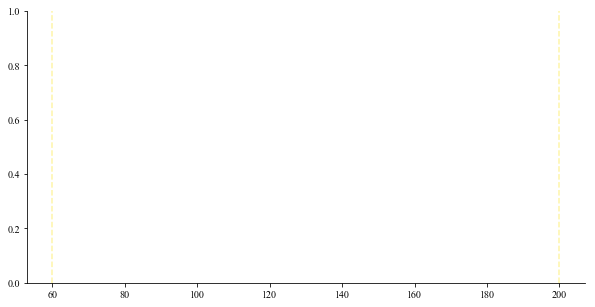

In [244]:
plt.figure(figsize=(10,5))
plt.axvline(60, linestyle='--', color=colors[10], alpha=.4)
plt.axvline(200, linestyle='--', color=colors[10], alpha=.4)


plt.plot(100*predict_full['energy'].unique(), energy_means['pred_mean'], 'x', color=colors[5], label='Mean')
plt.fill_between(100*predict_full['energy'].unique(), energy_means['pred_mean'] + energy_means['pred_std'], \
                 energy_means['pred_mean'] - energy_means['pred_std'], alpha=.2, color = colors[5], label='$\pm \sigma$')
plt.title('Predictions for different beam energies (averaged over energy range) \n', fontsize=15)
plt.xlabel('Beam energy (keV)', fontsize=14)
plt.ylabel('Intensity (a.u.)', fontsize=14)
plt.legend()
plt.xlim([0,300])
energy_means

In [195]:
totalfile = pd.concat(totalfile, energy_means)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

Below, the distribution of $\chi^2$ is plotted for training over the $N_{rep}$ MC replicas.

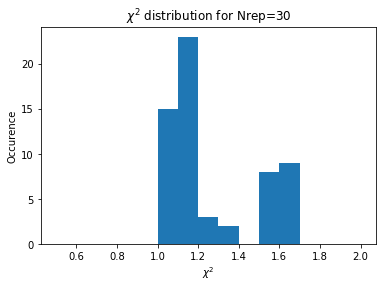

In [162]:
%run Evaluate_pseudodata.ipynb
%run Functions.ipynb
Nrep=30
plt.hist(chi2_array, bins=15, range=[0.5, 2])
plt.title('$\chi^2$ distribution for Nrep=30')
plt.xlabel('$\chi^2$')
plt.ylabel('Occurence')
plt.savefig('Data/Results/%(date)s/aaa chidistribution_%(epoch)s_Nrep=%(i)s' % {"date": d_string, "epoch": training_epochs, "i": Nrep })

plt.show()


## Residuals

In [147]:
N_train = len(train_x[:,0])

best_pred = pseudo_pred[N_train*12 :N_train*13 ]
best_y = pseudo_y[N_train*12 :N_train*13]
train_sigma = train_sigma.reshape(N_train,)

best_res = residuals(best_pred, best_y, train_sigma)

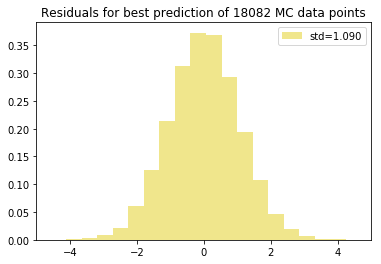

In [148]:
n, bins = np.histogram(best_res, bins=10)

mids = 0.5*(bins[1:] + bins[:-1])
probs = n / np.sum(n)

mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

label1 = 'std=%(std).5s' % {"std":sd}

fig = plt.hist(best_res, bins=20, density=True, color='khaki', label=label1)
plt.title('Residuals for best prediction of %(N_train)s MC data points' % {"N_train": N_train})
plt.legend([label1])

plt.xlim([-5,5])
plt.show()

## Extrapolation in energy loss

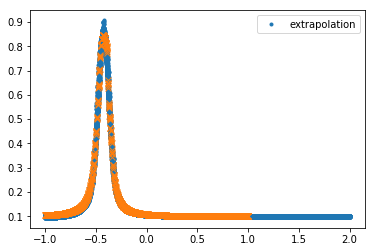

In [224]:
x_extrapol = extrapolation['dE']
prediction = extrapolation['D']
plt.plot(x_extrapol, prediction, '.', label='extrapolation')
plt.plot(train_x[index10060,0].T, predictions_values[index10060], 'x')

plt.legend()


## Interpolation in Beam Energy

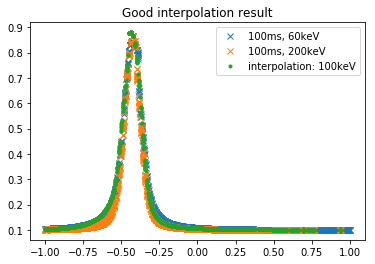

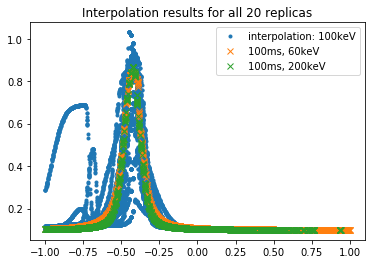

In [230]:
%run Evaluate_pseudodata.ipynb

x_interpol = interpolation['dE']

k=4
prediction_interpol = interpolation['D']
plt.plot(train_x[index10060,0].T, predictions_values[index10060], 'x', label='100ms, 60keV')
plt.plot(train_x[index100200,0].T, predictions_values[index100200], 'x', label='100ms, 200keV')
plt.plot(x_interpol[k * N_interpol : (k+1)*N_interpol], prediction_interpol[k*N_interpol :(k+1)*N_interpol], '.', label='interpolation: 100keV')
plt.title('Good interpolation result')
plt.legend()
plt.show()

plt.plot(x_interpol, prediction_interpol, '.', label='interpolation: 100keV')
plt.plot(train_x[index10060,0].T, predictions_values[index10060], 'x', label='100ms, 60keV')
plt.plot(train_x[index100200,0].T, predictions_values[index100200], 'x', label='100ms, 200keV')
plt.title('Interpolation results for all 20 replicas')
plt.legend()
plt.show()


## Write everything to report file

In [157]:
import sys
import base64

energy = 200
time = 10
nbins = 60
training_epochs = 100000

reportname = r'Reports/%(date)s_%(energy)skeV_%(time)sms_e%(epoch)s_Nrep=%(i)s.html' % {"date": d_string, "energy":energy, "time": time, "epoch": training_epochs, "i": Nrep }
sys.stdout = open(reportname,'w')


from prettytable import PrettyTable
list1 = ['Energy:','Exposure time:','Nbins:', 'Replicas:', 'Training epochs:']
list2 = [energy, time, nbins, Nrep, training_epochs]

for x in range(0,5):
    print('%(s1)s %(s2)s <br />' % {"s1": list1[x], "s2": list2[x]}) 



In [ ]:
plot1 = r'Data/Results/%(date)s/aaa chidistribution_%(energy)s_%(time)sms_e%(epoch)s_Nrep=%(i)s.png' % {"date": d_string, "energy":energy, "time": time, "epoch": training_epochs, "i": Nrep }
plot2 = r'Data/Results/%(date)s/aaa means-vs-means_%(energy)s_%(time)sms_e%(epoch)s_Nrep=%(i)s.png' % {"date": d_string, "energy":energy, "time": time, "epoch": training_epochs, "i": Nrep }
plot3 = r'Data/Results/%(date)s/aaa std-vs-std_%(energy)s_%(time)sms_e%(epoch)s_Nrep=%(i)s.png' % {"date": d_string, "energy":energy, "time": time, "epoch": training_epochs, "i": Nrep }
plot4 = r'Data/Results/%(date)s/aaa Residuals_%(energy)s_%(time)sms_e%(epoch)s_Nrep=%(i)s.png' % {"date": d_string, "energy":energy, "time": time, "epoch": training_epochs, "i": Nrep }

data_uri1 = base64.b64encode(open(plot1, 'rb').read()).decode('utf-8')
data_uri2 = base64.b64encode(open(plot2, 'rb').read()).decode('utf-8')
data_uri3 = base64.b64encode(open(plot3, 'rb').read()).decode('utf-8')
data_uri4 = base64.b64encode(open(plot4, 'rb').read()).decode('utf-8')
img_tag1 = '<img src="data:image/png;base64,{0}">'.format(data_uri1)
img_tag2 = '<img src="data:image/png;base64,{0}">'.format(data_uri2)
img_tag3 = '<img src="data:image/png;base64,{0}">'.format(data_uri3)
img_tag4 = '<img src="data:image/png;base64,{0}">'.format(data_uri4)

print(img_tag1)
print(img_tag2)
print(img_tag3)
print(img_tag4)